In [1]:
%load_ext autoreload
%autoreload 2

In [256]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
from glob import glob
import sys
sys.path.append('../src/')
from parsing import Parse
datasetfolder = "i:/StarCraft_BO/replayActionList/*"
datasetfiles = glob(datasetfolder)

In [12]:
terran_units = ['SCV',
                'MULE',
                'Marine',
                'Marauder',
                'Reaper','Ghost',
                'Hellion',
                'Hellbat',
                'SiegeTank',
                'Cyclone',
                'WidowMine',
                'Thor',
                'Viking',
                'Medivac',
                'Liberator',
                'Raven',
                'Banshee',
                'Battlecruiser']

In [188]:
terran_buildings = [
    'CommandCenter',
    'PlanetaryFortress',
    'OrbitalCommand',
    'SupplyDepot',
    'Refinery',
    'Barracks',
    'EngineeringBay',
    'Bunker',
    'SensorTower',
    'MissileTurret',
    'Factory',
    'GhostAcademy',
    'Starport',
    'Armory',
    'FusionCore',
    'TechLab',
    'Reactor',
    'AutoTurret'
]

In [212]:
bos = []
for dataset in datasetfiles[:1000]:
    sc = Parse(dataset)
    if sc.p1_race == 'Terran':
        bos.append(sc.extract_building(1))
    if sc.p2_race == 'Terran':
        bos.append(sc.extract_building(2))

In [213]:
len(bos)

583

In [218]:
mat = np.zeros((len(bos[0]), len(terran_buildings)+1))

In [219]:
for i, x in enumerate(bos[0]):
    mat[i, terran_buildings.index(x[1])] = 1.0
    mat[i, -1] = x[0]

11.278 ms/frame

In [220]:
df = pd.DataFrame(mat[:,:-1], columns=terran_buildings, index=mat[:,-1])

In [221]:
df.head()

,CommandCenter,PlanetaryFortress,OrbitalCommand,SupplyDepot,Refinery,Barracks,EngineeringBay,Bunker,SensorTower,MissileTurret,Factory,GhostAcademy,Starport,Armory,FusionCore,TechLab,Reactor,AutoTurret
3800.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7964.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9156.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15244.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [222]:
df.tail()

,CommandCenter,PlanetaryFortress,OrbitalCommand,SupplyDepot,Refinery,Barracks,EngineeringBay,Bunker,SensorTower,MissileTurret,Factory,GhostAcademy,Starport,Armory,FusionCore,TechLab,Reactor,AutoTurret
59972.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
60072.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
60084.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
63356.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63536.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


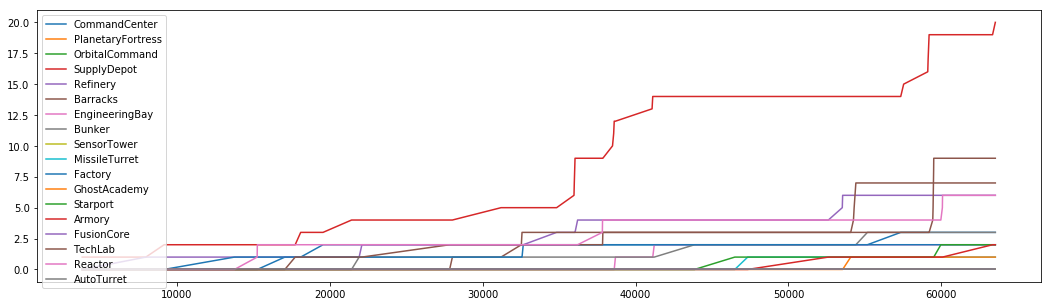

In [223]:
df.cumsum(axis=0).plot(figsize=(18,5))
plt.show()

axes:  
* 0 : frames (0 - 60000)
* 1 : buildings ( 0 - 17)
* 2 : games

In [247]:
def build_orders(bo, max_steps, building_list):
    mat = np.zeros((len(bo), len(building_list), max_steps))
    for i,b in enumerate(bo):
        for row in b:
            if (int(row[0]) < max_steps) and (row[1] in building_list):
                mat[i, int(building_list.index(row[1])), int(row[0])] = 1.
    frames_per_sec  = int(1000/11.278)
    n_steps = int(max_steps/frames_per_sec)
    s = zip(np.arange(0, (n_steps-1)*frames_per_sec, frames_per_sec),
           np.arange(frames_per_sec, n_steps*frames_per_sec, frames_per_sec))
    mat_per_sec = np.array([mat[:,:,x:y] for x,y in s])
    max_mat_per_sec = np.max(mat_per_sec, axis=3)
    mat_mean = np.mean(max_mat_per_sec, axis=1)
    return pd.DataFrame(mat_mean, columns=building_list, index=pd.timedelta_range(0, periods= n_steps-1, freq='S'))

In [224]:
mat = np.zeros((len(bos), len(terran_buildings), 60000))

In [226]:
for i,bo in enumerate(bos):
    for row in bo:
        if (int(row[0]) < 60000) and (row[1] in terran_buildings):
            mat[i, int(terran_buildings.index(row[1])),  int(row[0])] = 1.

In [227]:
mat.shape

(583, 18, 60000)

In [228]:
frames_per_sec = int(1000/11.278)
frames_per_sec

88

In [229]:
n_steps = int(60000/frames_per_sec)
n_steps

681

In [230]:
end = n_steps*frames_per_sec
end

59928

In [231]:
s = zip(np.arange(0,(n_steps-1)*frames_per_sec, frames_per_sec), np.arange(frames_per_sec, n_steps*frames_per_sec, frames_per_sec))

In [232]:
mat_per_sec = np.array([mat[:,:,x:y] for x,y in s])

In [233]:
mat_per_sec.shape

(680, 583, 18, 88)

In [234]:
max_mat_per_sec = np.max(mat_per_sec, axis=3)

In [235]:
max_mat_per_sec.shape

(680, 583, 18)

In [236]:
mean_mat = np.mean(max_mat_per_sec, axis=1)

In [237]:
mean_mat.shape

(680, 18)

In [238]:
df = pd.DataFrame(mean_mat, columns=terran_buildings, index=pd.timedelta_range(0,periods=n_steps-1, freq='S'))

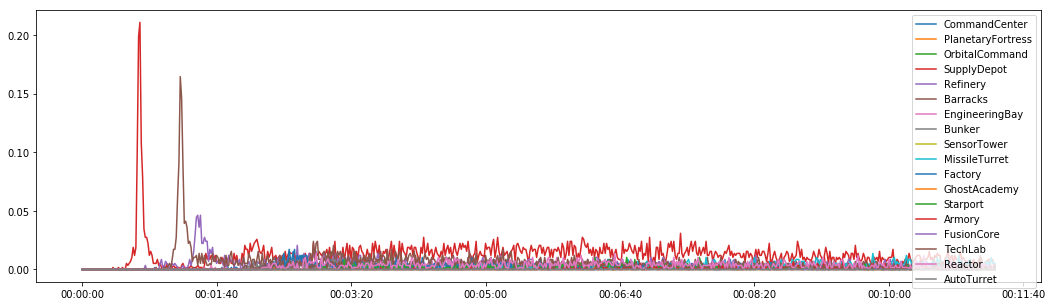

In [239]:
df.plot(figsize=(18,5))
plt.show()

In [254]:
df = build_orders(bos, max_steps=14000, building_list=terran_buildings)

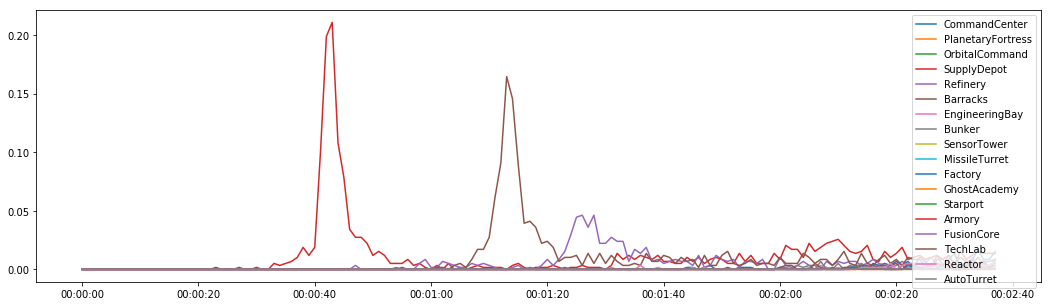

In [255]:
df.plot(figsize=(18,5))
plt.show()

In [257]:
def select_bo(datasetfiles, race, n_bo=1000, winners=True):
    datafiles = random.sample(datasetfiles, n_bo)
    bos = []
    for dataset in datafiles:
        sc = Parse(dataset)
        if winners:
            if sc.p1_race == race and sc.winner == 0:
                bos.append(sc.extract_building(1))
            if sc.p2_race == race and sc.winner == 1:
                bos.append(sc.extract_building(2))
        else:
            if sc.p1_race == race and sc.winner == 1:
                bos.append(sc.extract_building(1))
            if sc.p2_race == race and sc.winner == 0:
                bos.append(sc.extract_building(2))
    return bos

In [277]:
win_bo = select_bo(datasetfiles, 'Terran', n_bo=2000)

In [278]:
loss_bo = select_bo(datasetfiles, 'Terran', n_bo=2000, winners=False)

In [279]:
win_df = build_orders(win_bo, max_steps=15000, building_list=terran_buildings)
loss_df = build_orders(loss_bo, max_steps=15000, building_list=terran_buildings)

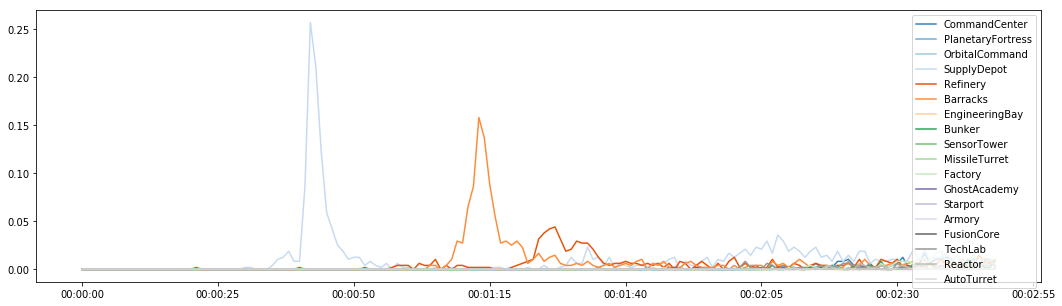

In [280]:
win_df.plot(figsize=(18,5), colormap='tab20c')
plt.show()

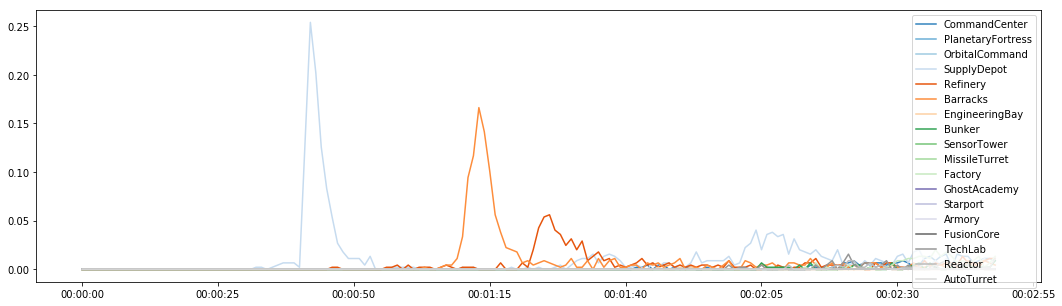

In [281]:
loss_df.plot(figsize=(18,5), colormap='tab20c')
plt.show()

In [282]:
win_bo = select_bo(datasetfiles, 'Zerg', n_bo=1000)
loss_bo = select_bo(datasetfiles, 'Zerg', n_bo=1000, winners=False)

In [283]:
zerg_building = [
    'Hatchery',
    'SpineCrawler',
    'SporeCrawler',
    'Extractor',
    'SpawningPool',
    'EvolutionChamber',
    'RoachWarren',
    'BanelingNest',
    'CreepTumor',
    'Lair',
    'HydraliskDen',
    'LurkerDen',
    'InfestationPit',
    'Spire',
    'NydusNetwork',
    'Hive',
    'GreaterSpire',
    'UltraliskCavern'
]

In [284]:
win_df = build_orders(win_bo, max_steps=15000, building_list=zerg_building)
loss_df = build_orders(loss_bo, max_steps=15000, building_list=zerg_building)

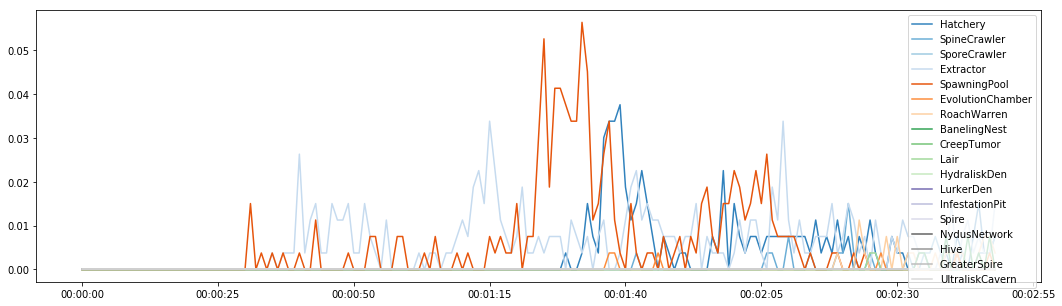

In [285]:
win_df.plot(figsize=(18,5), colormap='tab20c')
plt.show()

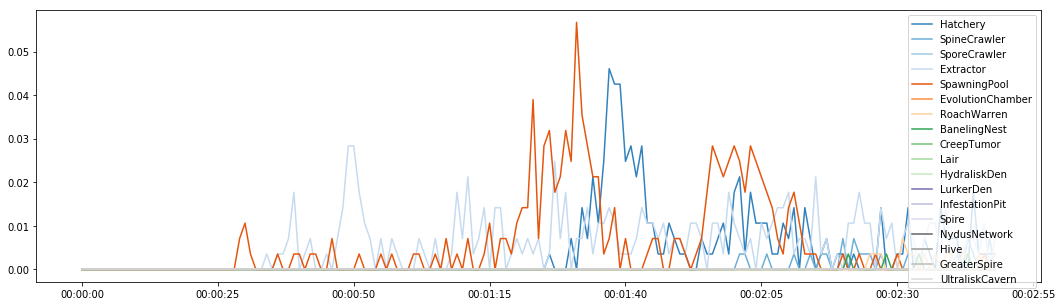

In [286]:
loss_df.plot(figsize=(18,5), colormap='tab20c')
plt.show()

In [287]:
protoss_buildings = [
    'Nexus',
    'Pylon',
    'Assimilator',
    'Gateway',
    'Forge',
    'CyberneticsCore',
    'PhotonCannon',
    'RoboticsFacility',
    'WarpGate',
    'Stargate',
    'TwilightCouncil',
    'RoboticsBay',
    'FleetBeacon',
    'TemplarArchives',
    'DarkShrine'
]

In [288]:
win_bo = select_bo(datasetfiles, 'Protos', n_bo=1000)
loss_bo = select_bo(datasetfiles, 'Protos', n_bo=1000, winners=False)

In [289]:
win_df = build_orders(win_bo, max_steps=15000, building_list=protoss_buildings)
loss_df = build_orders(loss_bo, max_steps=15000, building_list=protoss_buildings)

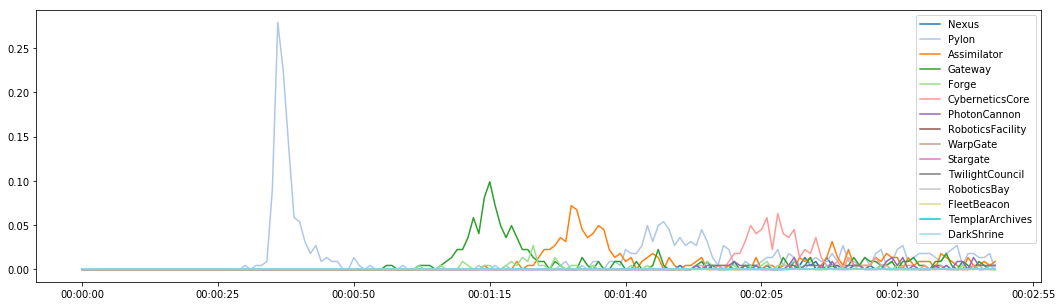

In [292]:
win_df.plot(figsize=(18,5), colormap='tab20')
plt.show()

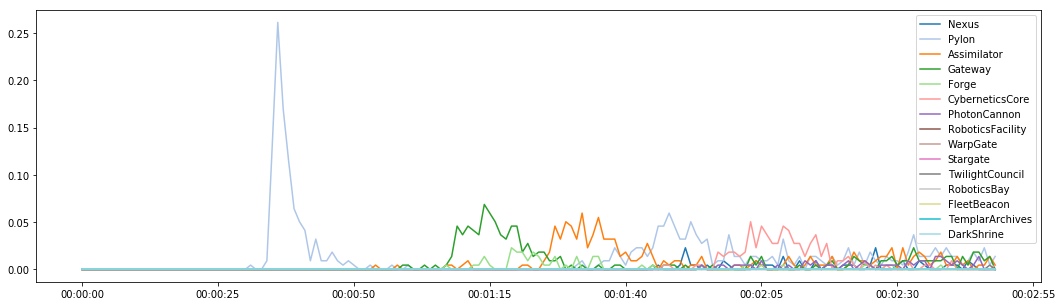

In [293]:
loss_df.plot(figsize=(18,5), colormap='tab20')
plt.show()